DATA CLEANING AND PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Loading the dataset
data = pd.read_csv('/content/cricket_players_injuries.csv')


# 1. Displaying basic info
print("Dataset Information:")
print(data.info())

print("\nFirst 5 rows of the dataset:")
print(data.head())

# 2. Checking for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in the Dataset:")
print(missing_values)

# Visualizing missing values using Plotly
missing_data = pd.DataFrame({'Column': missing_values.index, 'Missing Count': missing_values.values})
fig_missing = px.bar(
    missing_data, x='Column', y='Missing Count',
    title="Missing Values in Each Column", labels={'Missing Count': 'Count'}
)
fig_missing.update_layout(xaxis_title="Columns", yaxis_title="Missing Values")
fig_missing.show()

# 3. Checking for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Visualize duplicate row information
fig_duplicates = go.Figure(data=[
    go.Pie(
        labels=['Unique Rows', 'Duplicate Rows'],
        values=[len(data) - duplicate_rows, duplicate_rows],
        hole=0.4
    )
])
fig_duplicates.update_layout(title_text="Duplicate Rows Distribution")
fig_duplicates.show()

# Removing duplicates
data = data.drop_duplicates()
print("\nData after removing duplicates:")
print(data.info())

# 4. Handling numeric columns
# Identifying numeric columns for cleaning and conversion
numeric_columns = [
    'Test Matches', 'ODI Matches', 'FC Matches', 'LA Matches',
    'Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs',
    'Test Average', 'ODI Average', 'FC Average', 'LA Average',
    'Home Runs', 'Away Runs', 'Last 5 Years Runs', 'Last 2 Years Runs',
    'Top 4 Teams Runs', 'Bottom 4 Teams Runs'
]

# Clean numeric columns by removing commas, non-numeric characters, and converting to float
for col in numeric_columns:
    data[col] = data[col].replace({',': '', '-': '0', '–': '0', r'\[.*\]': '0'}, regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing numeric values with 0 (or use other imputation methods)
data[numeric_columns] = data[numeric_columns].fillna(0)

# 5. Visualizing outliers using Plotly
outlier_columns = ['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs']
for col in outlier_columns:
    fig_outlier = px.box(data, y=col, title=f"Outliers in {col}", points="all")
    fig_outlier.update_layout(yaxis_title=col, xaxis_title="Dataset")
    fig_outlier.show()

# 6. Summary of the dataset after preprocessing
summary = data.describe().transpose()
print("\nSummary of the Dataset after Preprocessing:")
print(summary)

# Visualize summary statistics
fig_summary = px.bar(
    summary, x=summary.index, y='mean',
    title="Mean of Numeric Columns After Cleaning",
    labels={'mean': 'Mean Value', 'index': 'Column'}
)
fig_summary.update_layout(xaxis_title="Columns", yaxis_title="Mean Value")
fig_summary.show()

# Saving the cleaned dataset
data.to_csv('cleaned_cricket_data.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_cricket_data.csv'")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  663 non-null    object 
 1   Nationality             663 non-null    object 
 2   Primary Role            663 non-null    object 
 3   Test Matches            663 non-null    object 
 4   ODI Matches             663 non-null    object 
 5   FC Matches              662 non-null    object 
 6   LA Matches              663 non-null    int64  
 7   Test Runs               663 non-null    object 
 8   ODI Runs                663 non-null    int64  
 9   FC Runs                 662 non-null    object 
 10  LA Runs                 663 non-null    object 
 11  Test Average            663 non-null    float64
 12  ODI Average             663 non-null    float64
 13  FC Average              663 non-null    float64
 14  LA Average           


Number of duplicate rows: 0



Data after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  663 non-null    object 
 1   Nationality             663 non-null    object 
 2   Primary Role            663 non-null    object 
 3   Test Matches            663 non-null    object 
 4   ODI Matches             663 non-null    object 
 5   FC Matches              662 non-null    object 
 6   LA Matches              663 non-null    int64  
 7   Test Runs               663 non-null    object 
 8   ODI Runs                663 non-null    int64  
 9   FC Runs                 662 non-null    object 
 10  LA Runs                 663 non-null    object 
 11  Test Average            663 non-null    float64
 12  ODI Average             663 non-null    float64
 13  FC Average              663 non-null    float64
 14  LA Averag


Summary of the Dataset after Preprocessing:
                        count         mean          std  min      25%  \
Test Matches            663.0    44.276018    63.152437  0.0   10.000   
ODI Matches             663.0   123.784314   424.723998  0.0   28.000   
FC Matches              663.0   127.110106   132.604966  0.0   33.000   
LA Matches              663.0   140.921569   125.408998  0.0   51.000   
Test Runs               663.0  1947.286576  2657.052357  0.0  200.000   
ODI Runs                663.0  2727.663650  5812.828306  0.0  160.000   
FC Runs                 663.0  5529.291101  8282.149682  0.0  299.500   
LA Runs                 663.0  3516.251885  4208.087289  0.0  290.500   
Test Average            663.0    26.080483    15.208810  0.0   14.250   
ODI Average             663.0    24.042410    13.843664  0.0   12.000   
FC Average              663.0    24.773454    15.777518  0.0   12.445   
LA Average              663.0    22.747240    15.011075  0.0    9.730   
Test W


Cleaned dataset saved as 'cleaned_cricket_data.csv'


DATA ANALYSIS

In [ ]:
# **1. Scatter Plot**
fig_scatter = px.scatter(data, x='ODI Matches', y='ODI Runs', color='Player', size='ODI Runs',
                         title="ODI Matches vs ODI Runs",
                         labels={'ODI Matches': 'ODI Matches', 'ODI Runs': 'ODI Runs'})
fig_scatter.show()

In [ ]:
fig_scatter_runs_avg = px.scatter(
    data,
    x='ODI Runs',
    y='ODI Average',
    color='Nationality',
    size='ODI Matches',
    title="ODI Runs vs ODI Average by Nationality",
    labels={'ODI Runs': 'ODI Runs', 'ODI Average': 'ODI Average'}
)
fig_scatter_runs_avg.show()

In [ ]:
# 3. **Pie Chart: Total Runs Contribution**
fig_pie_runs = px.pie(
    names=['Home Runs', 'Away Runs'],
    values=[data['Home Runs'].sum(), data['Away Runs'].sum()],
    title="Contribution of Total Runs (Home vs Away)"
)
fig_pie_runs.show()

In [ ]:
# 4. **Box Plot: Distribution of Runs Across Formats**
fig_box_runs = px.box(
    data,
    y=['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs'],
    title="Distribution of Runs Across Formats",
    labels={'value': 'Runs', 'variable': 'Format'}
)
fig_box_runs.show()

# 5. **Heatmap: Player Performances Across Metrics**
heatmap_data = data.set_index('Player')[[
    'Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs',
    'Home Runs', 'Away Runs', 'Last 5 Years Runs', 'Last 2 Years Runs'
]].fillna(0)
fig_heatmap = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Viridis',
    colorbar=dict(title="Performance Metrics")
))
fig_heatmap.update_layout(title="Player Performances Across Metrics", xaxis_title="Metrics", yaxis_title="Player")
fig_heatmap.show()

# 6. **Radar Chart: Format Comparison for a Single Player**
player_name = "Sachin Tendulkar"  # Replace this with a player's name
player_data = data[data['Player'] == player_name].iloc[0]
categories = ['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs']
fig_radar = go.Figure()
fig_radar.add_trace(go.Scatterpolar(
    r=[player_data[metric] for metric in categories],
    theta=categories,
    fill='toself',
    name=player_name
))
fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(player_data[categories].values)])
    ),
    title=f"Format Comparison for {player_name}"
)
fig_radar.show()

# 7. **Line Chart: Historical Performance (Last 5 vs Last 2 Years)**
fig_line_history = px.line(
    x=['Last 5 Years Runs', 'Last 2 Years Runs'],
    y=data[['Last 5 Years Runs', 'Last 2 Years Runs']].mean(axis=0),
    title="Historical Performance (Last 5 vs Last 2 Years)",
    labels={'value': 'Runs', 'variable': 'Time Period'}
)
fig_line_history.show()




In [ ]:
# Ensuring the '100s/50s' columns are correctly formatted
centuries_and_fifties = data[['Player', 'Test 100s/50s', 'ODI 100s/50s', 'FC 100s/50s', 'LA 100s/50s']].copy()

# Reshape the data for easier processing
centuries_and_fifties = centuries_and_fifties.melt(id_vars='Player', var_name='Format', value_name='100s/50s')

# Clean and extract the '100s' values safely
def extract_hundreds(value):
    try:
        return int(value.split('/')[0])  # Extract the first part before '/'
    except (ValueError, AttributeError):
        return 0  # Handle invalid entries gracefully

centuries_and_fifties['100s'] = centuries_and_fifties['100s/50s'].apply(extract_hundreds)

# Create the treemap
fig_treemap_centuries = px.treemap(
    centuries_and_fifties,
    path=['Player', 'Format'],
    values='100s',
    title="Contribution of Centuries Across Formats",
    labels={'100s': 'Number of Centuries'}
)
fig_treemap_centuries.show()


ANALYSIS FROM SCRATCH

In [ ]:
import plotly.express as px

# Filter data for the selected players
players = ['Sachin Tendulkar', 'Virat Kohli']
metrics = ['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs']

player_data = data[data['Player'].isin(players)][['Player'] + metrics].copy()

# Convert columns to numeric
for col in metrics:
    player_data[col] = player_data[col].replace(',', '', regex=True).astype(float)

# Plot normalized data comparison
normalized_data_melted = player_data.melt(id_vars='Player', var_name='Metric', value_name='Runs')
fig_bar = px.bar(normalized_data_melted, x='Metric', y='Runs', color='Player', barmode='group',
                 title="Player Comparison - Runs Across Metrics")
fig_bar.show()


In [ ]:
import plotly.graph_objects as go

# Select metrics for heatmap
metrics = ['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs']
heatmap_data = player_data.set_index('Player')[metrics].round(1)

fig_heatmap = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=metrics,
    y=heatmap_data.index,
    colorscale='Viridis',
    colorbar=dict(title="Metric Value")
))
fig_heatmap.update_layout(title="Player Comparison - Heatmap")
fig_heatmap.show()


In [ ]:
import plotly.graph_objects as go

# Convert data to normalized values or select any other normalization
categories = ['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs']
fig_radar = go.Figure()

for _, row in player_data.iterrows():
    fig_radar.add_trace(go.Scatterpolar(
        r=row[categories].values,
        theta=categories,
        fill='toself',
        name=row['Player']
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  # Normalized range
        )),
    showlegend=True,
    title="Player Comparison - Radar Chart"
)

fig_radar.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Metrics for comparison
metrics = ['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs']
fig_stacked_bar = go.Figure()

# Initialize bottom for stacked bar
bottom = np.zeros(len(players))
x = np.arange(len(players))

for metric in metrics:
    fig_stacked_bar.add_trace(go.Bar(
        x=player_data['Player'],
        y=player_data[metric],
        name=metric,
        base=bottom
    ))
    bottom += player_data[metric]

fig_stacked_bar.update_layout(
    barmode='stack',
    title="Player Comparison - Stacked Bar Chart",
    xaxis_title="Players",
    yaxis_title="Metric Value",
    xaxis_tickangle=-45
)

fig_stacked_bar.show()


In [ ]:
import plotly.express as px

# Create box plot for Runs in each format
fig_box = px.box(data, x='Nationality', y='Test Runs', points="all", title="Box Plot of Test Runs by Nationality")
fig_box.show()

fig_box_odi = px.box(data, x='Nationality', y='ODI Runs', points="all", title="Box Plot of ODI Runs by Nationality")
fig_box_odi.show()


In [ ]:
import plotly.express as px

# Create violin plot for distribution of Test Runs by Nationality
fig_violin = px.violin(data, x='Nationality', y='Test Runs', box=True, points="all", title="Violin Plot of Test Runs by Nationality")
fig_violin.show()


In [ ]:
import plotly.express as px

# Create bubble chart for Test Runs vs Test Average with size as Test Matches
fig_bubble = px.scatter(data, x='Test Runs', y='Test Average', size='Test Matches', color='Nationality',
                        title="Bubble Chart of Test Runs vs Average")
fig_bubble.show()


In [ ]:
import plotly.express as px

# Create histogram for the distribution of ODI Runs
fig_hist = px.histogram(data, x='ODI Runs', nbins=30, title="Histogram of ODI Runs")
fig_hist.show()


In [ ]:
import plotly.express as px

# Create scatter plot of Test Runs vs Test Average
fig_scatter = px.scatter(data, x='Test Runs', y='Test Average', color='Nationality', title="Scatter Plot of Test Runs vs Average")
fig_scatter.show()


Analysis end

Analysis final


In [ ]:
import plotly.express as px

# Filter data for Home and Away Runs
fig_comparison = px.bar(data, x='Player', y=['Home Runs', 'Away Runs'],
                        title="Comparison of Home vs. Away Performances",
                        barmode='group')
fig_comparison.show()


In [ ]:
import plotly.express as px

# Create a scatter plot for runs against top vs bottom teams
fig_scatter = px.scatter(data, x='Top 4 Teams Runs', y='Bottom 4 Teams Runs',
                         title="Best Performances Against Top/Bottom Teams")
fig_scatter.show()


In [ ]:
import plotly.graph_objects as go

# Radar chart for a player
metrics = ['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs']
fig_radar = go.Figure()

for _, row in data.iterrows():
    fig_radar.add_trace(go.Scatterpolar(
        r=row[metrics].values,
        theta=metrics,
        fill='toself',
        name=row['Player']
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  # Normalized range
        )),
    showlegend=True,
    title="Player Skill Profiling - Radar Chart"
)

fig_radar.show()


Comparative


In [ ]:
import plotly.express as px

# Select players and metrics
players = ['Sachin Tendulkar', 'Virat Kohli']
metrics = ['Test Runs', 'ODI Runs', 'FC Runs', 'Test Average']

player_data = data[data['Player'].isin(players)][['Player'] + metrics].copy()

# Plot comparison
fig_bar = px.bar(player_data, x='Player', y=metrics, title="Player Comparison Across Metrics")
fig_bar.show()


In [ ]:
import plotly.express as px

# Top performers by format
fig_performance = px.bar(data, x='Player', y=['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs'],
                         title="Top Performers in Specific Formats")
fig_performance.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Select relevant columns and normalize
metrics = ['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs']
data_normalized = data[metrics].copy()
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_normalized), columns=metrics)

# Plot normalized comparison
fig_normalized = px.bar(data, x='Player', y=data_normalized.columns, title="Normalized Player Comparison")
fig_normalized.show()


In [ ]:
import plotly.express as px

# Create bar plot for runs across formats
fig_runs = px.bar(data, x='Player', y=['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs'],
                  title="Runs Scored by Players Across Formats")
fig_runs.show()


In [ ]:
import plotly.express as px

# Average performance comparison
fig_avg = px.bar(data, x='Player', y=['Test Average', 'ODI Average', 'FC Average', 'LA Average'],
                 title="Average Performance Across Formats")
fig_avg.show()


In [ ]:
import plotly.express as px

# Plot top scores by format
fig_top_scores = px.bar(data, x='Player', y=['Test Top score', 'ODI Top score', 'FC Top score', 'LA Top score'],
                        title="Top Scores by Players Across Formats")
fig_top_scores.show()


National Level Analysis


In [ ]:
import plotly.express as px

# Top performers by nationality
fig_nationality = px.bar(data, x='Nationality', y=['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs'],
                          title="Top Performers by Nationality")
fig_nationality.show()


In [ ]:
import plotly.express as px

# Distribution of players by nationality
fig_distribution = px.histogram(data, x='Nationality', title="Distribution of Players by Nationality")
fig_distribution.show()


In [ ]:
import plotly.express as px

# Combined strength based on player stats
fig_team_strength = px.bar(data, x='Nationality', y=['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs'],
                           title="National Teams' Strength Based on Player Statistics")
fig_team_strength.show()


Performance Trends

In [ ]:
import plotly.express as px

# Create time-series plot for runs over time
fig_time_series = px.line(data, x='Player', y=['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs'],
                          title="Runs Distribution Over Time")
fig_time_series.show()


In [ ]:
import plotly.express as px

# Player form analysis
fig_player_form = px.bar(data, x='Player', y=['Last 5 Years Runs', 'ODI Runs'],
                         title="Player Form Analysis - Last 5 Years vs. Current")
fig_player_form.show()


In [ ]:
import plotly.express as px

# Visualize averages over career span
fig_averages = px.line(data, x='Player', y=['Test Average', 'ODI Average', 'FC Average'],
                       title="Averages Over Career Span")
fig_averages.show()


Team Strength Analysis


In [ ]:
import plotly.express as px

# Combined team metrics
fig_team_metrics = px.bar(data, x='Nationality', y=['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs'],
                          title="Combined Team Metrics")
fig_team_metrics.show()


In [ ]:
import plotly.express as px

# Contribution of star players
fig_star_players = px.bar(data, x='Player', y=['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs'],
                          title="Contribution of Star Players to Team Success")
fig_star_players.show()


In [ ]:
import plotly.graph_objects as go

# Radar chart for team comparisons
teams = ['India', 'Australia']
fig_radar = go.Figure()

for team in teams:
    team_data = data[data['Nationality'] == team]
    fig_radar.add_trace(go.Scatterpolar(
        r=team_data[['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs']].values.flatten(),
        theta=['Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs'],
        fill='toself',
        name=team
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  # Normalized range
        )),
    showlegend=True,
    title="Radar Chart for Team Comparisons"
)

fig_radar.show()


Analysis final


FUNCTIONALITIES

Start

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# Load the dataset
file_path = '/content/cricket_players_updated.csv'
data = pd.read_csv(file_path)

# Helper Functions
def search_player(name):
    """Search for a player by name."""
    result = data[data['Player'].str.contains(name, case=False, na=False)]
    return result

def custom_player_rating(weights):
    """
    Calculate a custom player rating based on weighted metrics.
    Ratings are scaled to integers from 1 to 10.
    Weights is a dictionary with column names as keys and their respective weights as values.
    Example: {'ODI Runs': 0.4, 'ODI Average': 0.3, 'Test Average': 0.3}
    """
    normalized_data = data.copy()
    for col in weights.keys():
        if col in data.columns:
            # Convert to numeric, handling commas and missing values
            normalized_data[col] = pd.to_numeric(
                normalized_data[col].astype(str).str.replace(',', ''), errors='coerce'
            ).fillna(0)
            # Normalize the column values
            normalized_data[col] = normalized_data[col] / normalized_data[col].max()
    # Calculate weighted sum for custom ratings
    normalized_data['Custom Rating'] = (
        sum(normalized_data[col] * weight for col, weight in weights.items())
    )
    # Scale to 1-10
    normalized_data['Custom Rating'] = (
        1 + (normalized_data['Custom Rating'] * 9)
    ).round().astype(int)
    return normalized_data[['Player', 'Custom Rating']].sort_values(
        by='Custom Rating', ascending=False
    )

def filter_players(keyword, condition):
    """
    Filter players based on a condition.
    Example: filter_players('ODI Runs', '> 10000')
    """
    if keyword in data.columns:
        # Ensure column name is wrapped in backticks for spaces or special characters
        return data.query(f"`{keyword}` {condition}")
    else:
        return f"Keyword '{keyword}' not found in dataset columns."


def normalize_data(df, metrics):
    """
    Normalize the player data to the range [0, 1].
    """
    normalized_df = df.copy()
    for metric in metrics:
        max_value = df[metric].max()
        min_value = df[metric].min()
        normalized_df[metric] = (df[metric] - min_value) / (max_value - min_value)
    return normalized_df

def compare_players_visual_updated(players):
    """
    Compare statistics for multiple players and visualize using selected metrics.
    Focuses on specific columns provided in the dataset.
    """
    metrics = [
        'Test Matches', 'ODI Matches', 'FC Matches', 'LA Matches',
        'Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs',
        'Home Runs', 'Away Runs', 'Last 5 Years Runs', 'Last 2 Years Runs',
        'Top 4 Teams Runs', 'Bottom 4 Teams Runs'
    ]

    # Filter data for the selected players
    player_data = data[data['Player'].isin(players)][['Player'] + metrics].copy()

    # Convert numeric columns (removing commas)
    for col in metrics:
        player_data[col] = player_data[col].replace(',', '', regex=True).astype(float)

    # Normalize metrics for fair comparison
    normalized_data = normalize_data(player_data, metrics)

    # 1. Normalized Bar Chart (using Plotly)
    normalized_data_melted = normalized_data.melt(id_vars='Player', var_name='Metric', value_name='Normalized Value')
    fig_bar = px.bar(normalized_data_melted, x='Metric', y='Normalized Value', color='Player', barmode='group',
                     title="Player Comparison - Normalized Bar Chart",
                     labels={'Normalized Value': 'Normalized Value', 'Metric': 'Metrics'})
    fig_bar.update_layout(xaxis_title="Metrics", yaxis_title="Normalized Value", xaxis_tickangle=-45)
    fig_bar.show()

    # 2. Heatmap (using Plotly)
    heatmap_data = player_data.set_index('Player')[metrics].round(1)  # Round to 1 decimal place
    fig_heatmap = go.Figure(data=go.Heatmap(
        z=heatmap_data.values,
        x=metrics,
        y=heatmap_data.index,
        colorscale='Viridis',
        colorbar=dict(title="Metric Value")
    ))
    fig_heatmap.update_layout(title='Player Comparison - Heatmap',
                              xaxis_title="Metrics",
                              yaxis_title="Player")
    fig_heatmap.show()

    # 3. Radar Chart (using Plotly)
    fig_radar = go.Figure()
    categories = metrics
    for _, row in normalized_data.iterrows():
        fig_radar.add_trace(go.Scatterpolar(
            r=row[metrics].values,
            theta=categories,
            fill='toself',
            name=row['Player']
        ))
    fig_radar.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]  # Normalized range
            )),
        showlegend=True,
        title="Player Comparison - Radar Chart"
    )
    fig_radar.show()

    # 4. Stacked Bar Chart (using Plotly)
    fig_stacked_bar = go.Figure()
    bottom = np.zeros(len(players))
    x = np.arange(len(players))
    for metric in metrics:
        fig_stacked_bar.add_trace(go.Bar(
            x=player_data['Player'],
            y=player_data[metric],
            name=metric,
            base=bottom
        ))
        bottom += player_data[metric]

    fig_stacked_bar.update_layout(
        barmode='stack',
        title="Player Comparison - Stacked Bar Chart",
        xaxis_title="Players",
        yaxis_title="Metric Value",
        xaxis_tickangle=-45
    )
    fig_stacked_bar.show()


def past_injury_tracking(player_name):
    """
    Simulate injury tracking (currently not in the dataset).
    Placeholder for injury-related data.
    """
    return f"Injury data for {player_name} not available in this dataset."




In [ ]:
# Example Usage
# 1. Search Player
print("Search Result:")
print(search_player("Sachin"))

Search Result:
             Player Nationality Test Matches ODI Matches FC Matches  \
0  Sachin Tendulkar       India          200         463        310   

   LA Matches Test Runs  ODI Runs FC Runs LA Runs  ... Test Catches/stumpings  \
0         551    15,921     18426  25,396  21,999  ...                  115/–   

  ODI Catches/stumpings FC Catches/stumpings LA Catches/stumpings Home Runs  \
0                 140/–                186/–                175/–      9835   

  Away Runs Last 5 Years Runs Last 2 Years Runs Top 4 Teams Runs  \
0      8591              8229              7431             9100   

  Bottom 4 Teams Runs  
0                9326  

[1 rows x 32 columns]


In [ ]:
# 2. Filter Players
print("\nFiltered Players (Runs > 10000 in ODI):")
print(filter_players('ODI Runs', '> 10000'))


Filtered Players (Runs > 10000 in ODI):
                   Player   Nationality Test Matches ODI Matches FC Matches  \
0        Sachin Tendulkar         India          200         463        310   
1             Virat Kohli         India          116         295        145   
2              Brian Lara   West Indies          131         299        261   
3           Ricky Ponting     Australia          168         375        289   
4          Jacques Kallis  South Africa          166         329        257   
6        Kumar Sangakkara     Sri Lanka          134         404         56   
7            Rahul Dravid         India          164         344        298   
11               MS Dhoni         India           90         350         98   
16            Chris Gayle   West Indies          103         301         79   
24         Inzamam-ul-Haq      Pakistan          120         378        245   
32      Sanath Jayasuriya     Sri Lanka          110         445        265   
56     Mahe

In [ ]:
# Players to compare
players_to_compare = ['Sachin Tendulkar', 'Virat Kohli']

# Perform comparison and visualize
compare_players_visual_updated(players_to_compare)


In [ ]:
# 4. Custom Player Rating
weights = {'ODI Runs': 0.4, 'ODI Average': 0.3, 'Test Average': 0.3}
print("\nCustom Player Ratings (Scaled 1 to 10):")
print(custom_player_rating(weights))


Custom Player Ratings (Scaled 1 to 10):
               Player  Custom Rating
0    Sachin Tendulkar              8
227  Kurtis Patterson              7
3       Ricky Ponting              7
6    Kumar Sangakkara              7
1         Virat Kohli              7
..                ...            ...
123  Sheldon Cottrell              1
442       Bishan Bedi              1
341     Rubel Hossain              1
109   Lockie Ferguson              1
571  Sheldon Cottrell              1

[572 rows x 2 columns]


In [ ]:
def keyword_based_filtering(data, filters):
    """
    Filter players based on keyword criteria like matches, runs, etc.
    Parameters:
        - data (pd.DataFrame): The dataset containing player statistics.
        - filters (dict): A dictionary with filter conditions.
          Example:
          {
              'ODI Runs': '> 10000',
              'Last 5 Years Runs': '> 5000'
          }
    Returns:
        - pd.DataFrame: Filtered players satisfying all criteria.
    """

    # Convert relevant columns to numeric, removing any non-numeric characters
    def convert_to_numeric(col):
        return pd.to_numeric(col.replace(',', '').replace('–', '0'), errors='coerce')

    # Apply the conversion to necessary columns
    numeric_columns = ['Test Matches', 'ODI Matches', 'FC Matches', 'LA Matches',
                       'Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs',
                       'Home Runs', 'Away Runs', 'Last 5 Years Runs',
                       'Last 2 Years Runs', 'Top 4 Teams Runs', 'Bottom 4 Teams Runs']

    for col in numeric_columns:
        if col in data.columns:
            data[col] = convert_to_numeric(data[col])

    # Apply each filter
    filtered_data = data.copy()
    for key, condition in filters.items():
        if key in data.columns:
            # Safeguard for special characters or spaces in column names
            filtered_data = filtered_data.query(f"`{key}` {condition}")
        else:
            print(f"Warning: '{key}' not found in dataset columns. Skipping this filter.")

    return filtered_data

# Example Filters
filters = {
    'ODI Runs': '> 10000',             # Players with more than 10,000 runs in ODI
    'Last 5 Years Runs': '> 5000',     # Players with more than 5000 runs in the last 5 years
    'Test Matches': '> 100'            # Players with more than 100 Test matches played
}

# Apply the filters
filtered_players = keyword_based_filtering(data, filters)

# Display the filtered players
print("Filtered Players:")
print(filtered_players)


Filtered Players:
               Player   Nationality  Test Matches  ODI Matches  FC Matches  \
0    Sachin Tendulkar         India         200.0        463.0       310.0   
4      Jacques Kallis  South Africa         166.0        329.0       257.0   
16        Chris Gayle   West Indies         103.0        301.0        79.0   
24     Inzamam-ul-Haq      Pakistan         120.0        378.0       245.0   
32  Sanath Jayasuriya     Sri Lanka         110.0        445.0       265.0   

    LA Matches  Test Runs  ODI Runs  FC Runs  LA Runs  ...  \
0          551        NaN     18426      NaN      NaN  ...   
4          424        NaN     11579      NaN      NaN  ...   
16         180        NaN     10480      NaN      NaN  ...   
24         458        NaN     11739      NaN      NaN  ...   
32         111        NaN     13430      NaN      NaN  ...   

   Test Catches/stumpings ODI Catches/stumpings FC Catches/stumpings  \
0                   115/–                 140/–                186/–

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def performance_trend_analysis_plotly(data, player_name):
    """
    Visualize a player's performance trend over different metrics (runs across formats, home/away) using Plotly.

    Parameters:
        - data (pd.DataFrame): The dataset containing player statistics.
        - player_name (str): The name of the player to analyze.

    Returns:
        - None (Displays an interactive plot of the performance trend).
    """
    # Search for the player's data
    player_data = data[data['Player'].str.contains(player_name, case=False, na=False)]

    if player_data.empty:
        print(f"Player '{player_name}' not found in the dataset.")
        return

    # Extract the performance data for the selected player
    player_data = player_data.iloc[0]  # If there are multiple entries, we take the first one

    # Metrics for the trend analysis
    metrics = ['ODI Runs', 'Test Runs', 'FC Runs', 'Home Runs', 'Away Runs', 'Last 5 Years Runs', 'Last 2 Years Runs']

    # Prepare data for plotting
    x_labels = ['ODI Runs', 'Test Runs', 'FC Runs', 'Home Runs', 'Away Runs', 'Last 5 Years Runs', 'Last 2 Years Runs']
    y_values = [player_data[metric] for metric in metrics]

    # Create a plot using Plotly
    fig = go.Figure()

    # Add the performance trend trace
    fig.add_trace(go.Scatter(
        x=x_labels,
        y=y_values,
        mode='lines+markers',
        name='Runs/Performance',
        line=dict(width=2, color='blue'),
        marker=dict(size=8, color='blue')
    ))

    # Customize the layout
    fig.update_layout(
        title=f"Performance Trend of {player_name}",
        xaxis_title='Performance Metrics',
        yaxis_title='Runs/Performance Value',
        template='plotly_dark',
        showlegend=True,
        xaxis=dict(tickangle=45),
        hovermode='closest'
    )

    # Show the plot
    fig.show()

# Example usage:
performance_trend_analysis_plotly(data, 'Sachin Tendulkar')


In [ ]:
import pandas as pd
import plotly.graph_objects as go

def performance_trend_analysis_time_plotly(data, player_name):
    """
    Visualize a player's performance trend over time across different formats (ODI, Test, FC) using Plotly.
    This assumes that we have time-based columns (Last 5 Years Runs, Last 2 Years Runs).

    Parameters:
        - data (pd.DataFrame): The dataset containing player statistics.
        - player_name (str): The name of the player to analyze.

    Returns:
        - None (Displays an interactive plot of the performance trend).
    """
    # Search for the player's data
    player_data = data[data['Player'].str.contains(player_name, case=False, na=False)]

    if player_data.empty:
        print(f"Player '{player_name}' not found in the dataset.")
        return

    # Extract the performance data for the selected player
    player_data = player_data.iloc[0]  # If there are multiple entries, we take the first one

    # Simulate the time periods (could be years, seasons, etc.)
    time_periods = ['2018-2023 (Last 5 Years)', '2021-2023 (Last 2 Years)', 'Recent Matches']

    # Simulate the player's performance trend over these time periods (example: last 5 years, last 2 years)
    performance_data = {
        'ODI Runs': [player_data['ODI Runs'], player_data['Last 2 Years Runs'], player_data['Last 5 Years Runs']],
        'Test Runs': [player_data['Test Runs'], player_data['Last 2 Years Runs'], player_data['Last 5 Years Runs']],
        'FC Runs': [player_data['FC Runs'], player_data['Last 2 Years Runs'], player_data['Last 5 Years Runs']],
    }

    # Create the figure using Plotly
    fig = go.Figure()

    # Add traces for each format (ODI, Test, FC)
    for format_name, values in performance_data.items():
        fig.add_trace(go.Scatter(
            x=time_periods,
            y=values,
            mode='lines+markers',
            name=format_name,
            line=dict(width=2),
            marker=dict(size=8)
        ))

    # Customize layout
    fig.update_layout(
        title=f"Performance Trend of {player_name} Over Time",
        xaxis_title='Time Period',
        yaxis_title='Runs/Performance Value',
        legend_title="Match Formats",
        template='plotly_dark',
        hovermode='closest'
    )

    # Show the plot
    fig.show()

# Example usage:
performance_trend_analysis_time_plotly(data, 'Sachin Tendulkar')


In [ ]:
import pandas as pd

# Sample dataset (assuming you have already loaded the data as 'data')

# Helper function for Match Conditions and Impact Filter
def match_conditions_filter(data, condition_type, threshold):
    """
    Filter players based on specific match conditions such as home vs away or top vs bottom teams.

    Parameters:
        - data (pd.DataFrame): The dataset containing player statistics.
        - condition_type (str): The condition to filter ('home_vs_away', 'top_vs_bottom').
        - threshold (int or float): The performance threshold to apply.

    Returns:
        - pd.DataFrame: Filtered dataset based on the condition.
    """
    if condition_type == 'home_vs_away':
        # Filter players based on home and away performance
        filtered_data = data[data['Home Runs'] > threshold]
        return filtered_data[['Player', 'Home Runs', 'Away Runs']]

    elif condition_type == 'top_vs_bottom':
        # Filter players based on performance against top 4 teams vs bottom 4 teams
        filtered_data = data[data['Top 4 Teams Runs'] > threshold]
        return filtered_data[['Player', 'Top 4 Teams Runs', 'Bottom 4 Teams Runs']]

    else:
        return "Invalid condition type. Please use 'home_vs_away' or 'top_vs_bottom'."

# Example usage for filtering:
# 1. Home vs Away performance, filter players who performed better at home (Home Runs > 9000)
print("Players with Home Runs > 9000:")
print(match_conditions_filter(data, 'home_vs_away', 9000))

# 2. Top vs Bottom Teams performance, filter players with top teams runs > 8000
print("\nPlayers with Top Teams Runs > 8000:")
print(match_conditions_filter(data, 'top_vs_bottom', 8000))


Players with Home Runs > 9000:
                Player  Home Runs  Away Runs
0     Sachin Tendulkar       9835       8591
1          Virat Kohli      10463       3443
2           Brian Lara       9475        930
3        Ricky Ponting      10413       3291
6     Kumar Sangakkara       9519       4715
7         Rahul Dravid      10084        805
11            MS Dhoni      10051        722
32   Sanath Jayasuriya      10075       3355
372         Rory Burns      11742       1595

Players with Top Teams Runs > 8000:
              Player  Top 4 Teams Runs  Bottom 4 Teams Runs
0   Sachin Tendulkar              9100                 9326
6   Kumar Sangakkara             10065                 4169
11          MS Dhoni              8990                 1783
12    Adam Gilchrist              8250                 1369
24    Inzamam-ul-Haq              9223                 2516


In [ ]:
import pandas as pd
import plotly.graph_objects as go

def historical_performance_comparison(data, player_name):
    """
    Compare a player's current performance with their past performance (e.g., last 5 years, last 2 years) and visualize it.

    Parameters:
        - data (pd.DataFrame): The dataset containing player statistics.
        - player_name (str): The name of the player to compare.

    Returns:
        - pd.DataFrame: Data showing current performance vs. past performance.
    """
    # Find the player's data in the dataset
    player_data = data[data['Player'].str.contains(player_name, case=False, na=False)]

    if player_data.empty:
        return f"Player '{player_name}' not found in dataset."

    # Current stats (e.g., ODI Runs, Test Runs, FC Runs, etc.)
    current_stats = player_data[['Player', 'ODI Runs', 'Test Runs', 'FC Runs', 'Home Runs', 'Away Runs']]

    # Past performance (Last 5 Years, Last 2 Years)
    past_stats = player_data[['Player', 'Last 5 Years Runs', 'Last 2 Years Runs']]

    # Calculate the percentage change between current and past stats
    current_stats = current_stats.set_index('Player')
    past_stats = past_stats.set_index('Player')

    # Calculate percentage change for runs (Last 5 Years vs. Current)
    performance_comparison = current_stats.copy()

    performance_comparison['Last 5 Years % Change'] = (
        (performance_comparison['ODI Runs'] - player_data['Last 5 Years Runs'].values[0]) /
        player_data['Last 5 Years Runs'].values[0] * 100
    )

    performance_comparison['Last 2 Years % Change'] = (
        (performance_comparison['ODI Runs'] - player_data['Last 2 Years Runs'].values[0]) /
        player_data['Last 2 Years Runs'].values[0] * 100
    )

    # Display the comparison data
    comparison_data = performance_comparison[['ODI Runs', 'Last 5 Years % Change', 'Last 2 Years % Change']]
    print(comparison_data)

    # Plotting using Plotly
    fig = go.Figure()

    # Bar chart for current vs past performance (ODI Runs)
    fig.add_trace(go.Bar(
        x=['Current ODI Runs', 'Last 5 Years ODI Runs', 'Last 2 Years ODI Runs'],
        y=[player_data['ODI Runs'].values[0], player_data['Last 5 Years Runs'].values[0], player_data['Last 2 Years Runs'].values[0]],
        name='ODI Runs',
        marker=dict(color='blue')
    ))

    # Bar chart for percentage change in performance
    fig.add_trace(go.Bar(
        x=['Last 5 Years % Change', 'Last 2 Years % Change'],
        y=[performance_comparison['Last 5 Years % Change'].values[0], performance_comparison['Last 2 Years % Change'].values[0]],
        name='Percentage Change',
        marker=dict(color='orange')
    ))

    # Update layout and labels
    fig.update_layout(
        title=f"Historical Performance Comparison for {player_name}",
        xaxis_title="Metrics",
        yaxis_title="Performance Value",
        barmode='group',
        template='plotly_dark',
        showlegend=True
    )

    fig.show()

    return comparison_data

player_name = "Sachin Tendulkar"
historical_comparison = historical_performance_comparison(data, player_name)


                  ODI Runs  Last 5 Years % Change  Last 2 Years % Change
Player                                                                  
Sachin Tendulkar     18426             123.915421             147.961243


In [ ]:
import pandas as pd
import plotly.graph_objects as go

def top_performer_highlight(data, period='Last 2 Years Runs'):
    """
    Highlight top-performing players based on recent performance and suggest the 'player of the week'.

    Parameters:
        - data (pd.DataFrame): The dataset containing player statistics.
        - period (str): The period to focus on for performance analysis (e.g., 'Last 2 Years Runs').

    Returns:
        - pd.DataFrame: Data of top performers based on selected period.
        - str: Name of the "Player of the Week".
    """
    # Ensure the column is available and the values are numeric
    if period not in data.columns:
        return f"Invalid period '{period}' specified. Available periods: 'Last 2 Years Runs', 'Last 5 Years Runs', etc."

    # Filter and sort the data by the chosen performance period
    data[period] = pd.to_numeric(data[period], errors='coerce')  # Ensure numeric values
    top_performers = data[['Player', period]].dropna().sort_values(by=period, ascending=False)

    # Identify the top player (Player of the Week)
    player_of_the_week = top_performers.iloc[0]['Player']
    print(f"Player of the Week: {player_of_the_week}")

    # Display the top performers (e.g., top 5)
    print("Top Performers:")
    print(top_performers.head(10))

    # Plotting Top Performers using Plotly
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=top_performers['Player'].head(10),
        y=top_performers[period].head(10),
        name=f"Top Performers ({period})",
        marker=dict(color='green')
    ))

    fig.update_layout(
        title=f"Top Performers Based on {period}",
        xaxis_title="Player",
        yaxis_title="Performance (Runs)",
        template='plotly_dark',
        showlegend=False
    )

    fig.show()

    return top_performers, player_of_the_week

top_performers_data, player_of_the_week = top_performer_highlight(data, 'Last 2 Years Runs')


Player of the Week: Jacques Kallis
Top Performers:
               Player  Last 2 Years Runs
4      Jacques Kallis               8192
0    Sachin Tendulkar               7431
20       Graeme Smith               6911
26        Ross Taylor               6621
16        Chris Gayle               6450
12     Adam Gilchrist               6193
372        Rory Burns               5535
256       Steve Waugh               5130
23        Hashim Amla               4794
92    Mohammad Hafeez               4644


Modelling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('/content/cricket_players_injuries.csv')

# Clean numeric columns (remove commas, invalid values like '-', '–', and strings like '124[nb 2]')
numeric_columns = [
    'Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs',
    'Test Average', 'ODI Average', 'FC Average', 'LA Average',
    'Home Runs', 'Away Runs', 'Last 5 Years Runs', 'Last 2 Years Runs',
    'Test Wickets', 'ODI Wickets', 'FC Wickets', 'LA Wickets',
    'Test Bowling Average', 'ODI Bowling Average', 'FC Bowling Average', 'LA Bowling Average'
]

# Replace commas, invalid values ('-', '–', '124[nb 2]', etc.) with NaN or 0, then convert to float
for col in numeric_columns:
    # Remove commas, invalid characters, and patterns like '[nb 2]'
    data[col] = data[col].replace({',': '', '-': '0', '–': '0', r'\[.*\]': '0'}, regex=True)

    # Replace any remaining non-numeric entries with NaN, then convert to numeric values
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill NaN values with 0
data = data.fillna(0)

# Filter by Nationality
filtered_data = data[data['Nationality'] == 'Australia']

# Simulate 'Selected' column based on primary role
filtered_data['Selected'] = 0
filtered_data.loc[
    (filtered_data['Primary Role'] == 'Batsman') &
    ((filtered_data['ODI Runs'] > 5000) | (filtered_data['Test Average'] > 40)), 'Selected'
] = 1
filtered_data.loc[
    (filtered_data['Primary Role'] == 'Bowler') &
    ((filtered_data['ODI Wickets'] > 150) | (filtered_data['Test Bowling Average'] < 30)), 'Selected'
] = 1

# Dynamic Feature Selection Based on Role
batsman_features = [
    'Test Matches', 'ODI Matches', 'FC Matches', 'LA Matches',
    'Test Runs', 'ODI Runs', 'FC Runs', 'LA Runs',
    'Test Average', 'ODI Average', 'FC Average', 'LA Average',
    'Home Runs', 'Away Runs', 'Last 5 Years Runs', 'Last 2 Years Runs'
]

bowler_features = [
    'Test Matches', 'ODI Matches', 'FC Matches', 'LA Matches',
    'Test Wickets', 'ODI Wickets', 'FC Wickets', 'LA Wickets',
    'Test Bowling Average', 'ODI Bowling Average', 'FC Bowling Average', 'LA Bowling Average',
    'Home Wickets', 'Away Wickets', 'Last 5 Years Wickets', 'Last 2 Years Wickets'
]

# Split data based on role
batsmen_data = filtered_data[filtered_data['Primary Role'] == 'Batsman']
bowlers_data = filtered_data[filtered_data['Primary Role'] == 'Bowler']

# Prepare training and test data for batsmen
X_batsmen = batsmen_data[batsman_features]
y_batsmen = batsmen_data['Selected']

# Prepare training and test data for bowlers
X_bowlers = bowlers_data[bowler_features]
y_bowlers = bowlers_data['Selected']

# Normalize Features
scaler_batsmen = MinMaxScaler()
X_batsmen_scaled = scaler_batsmen.fit_transform(X_batsmen)

scaler_bowlers = MinMaxScaler()
X_bowlers_scaled = scaler_bowlers.fit_transform(X_bowlers)

# Train-Test Split
X_batsmen_train, X_batsmen_test, y_batsmen_train, y_batsmen_test = train_test_split(X_batsmen_scaled, y_batsmen, test_size=0.2, random_state=42)
X_bowlers_train, X_bowlers_test, y_bowlers_train, y_bowlers_test = train_test_split(X_bowlers_scaled, y_bowlers, test_size=0.2, random_state=42)

# Define ANN Model
def build_model(input_dim):
    model = Sequential([
        Dense(16, input_dim=input_dim, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train model for batsmen
batsman_model = build_model(X_batsmen_train.shape[1])
batsman_model.fit(X_batsmen_train, y_batsmen_train, epochs=50, batch_size=8, validation_split=0.2)

# Train model for bowlers
bowler_model = build_model(X_bowlers_train.shape[1])
bowler_model.fit(X_bowlers_train, y_bowlers_train, epochs=50, batch_size=8, validation_split=0.2)

# Predict and Select Team
filtered_data['Selection Probability'] = 0

# Predict for batsmen
batsmen_data['Selection Probability'] = batsman_model.predict(X_batsmen_scaled)
# Predict for bowlers
bowlers_data['Selection Probability'] = bowler_model.predict(X_bowlers_scaled)

# Combine predictions
filtered_data.update(batsmen_data)
filtered_data.update(bowlers_data)

# Select top players
selected_team = filtered_data.nlargest(11, 'Selection Probability')
print(selected_team[['Player', 'Primary Role', 'Selection Probability']])


<ipython-input-1-e4b408c0e805>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Selected'] = 0
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7643 - loss: 0.5833 - val_accuracy: 0.3750 - val_loss: 0.7510
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8185 - loss: 0.5436 - val_accuracy: 0.3750 - val_loss: 0.7680
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7726 - loss: 0.5539 - val_accuracy: 0.3750 - val_loss: 0.7817
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7768 - loss: 0.5625 - val_accuracy: 0.3750 - val_loss: 0.7972
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7935 - loss: 0.5266 - val_accuracy: 0.3750 - val_loss: 0.8170
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8018 - loss: 0.5110 - val_accuracy: 0.3750 - val_loss: 0.8355
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7518 - loss: 0.5472 - val_accuracy: 0.3750 - val_loss: 0.8549
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8018 - loss: 0.4865 - val_accuracy: 0.3750 - val_loss: 0.8764

<ipython-input-1-e4b408c0e805>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Selection Probability'] = 0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


<ipython-input-1-e4b408c0e805>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_data['Selection Probability'] = batsman_model.predict(X_batsmen_scaled)


              Player Primary Role  Selection Probability
3      Ricky Ponting      Batsman               0.992747
263      Don Bradman      Batsman               0.977295
12    Adam Gilchrist      Batsman               0.963803
288       David Boon      Batsman               0.963736
13     Glenn McGrath       Bowler               0.963229
264     Ray Lindwall       Bowler               0.962288
207      Mike Hussey      Batsman               0.955593
446     Ray Lindwall       Bowler               0.952807
291    Damien Martyn      Batsman               0.950644
232  Michael Klinger      Batsman               0.920691
265     Keith Miller       Bowler               0.913144


<ipython-input-1-e4b408c0e805>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowlers_data['Selection Probability'] = bowler_model.predict(X_bowlers_scaled)
<ipython-input-1-e4b408c0e805>:110: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.99274701 0.         0.96380275 0.         0.         0.
 0.84878647 0.         0.         0.         0.88519847 0.
 0.80992258 0.59227592 0.84409362 0.78787589 0.84488136 0.70356518
 0.         0.         0.82937849 0.86378288 0.         0.59337264
 0.86284035 0.         0.         0.74000108 0.55463254 0.
 0.         0.         0.71459949 0.83935696 0.         0.
 0.         0.61049169 0.         0.         0.         0.
 0.         

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('/content/cricket_players_injuries.csv')

# Filter by Nationality (e.g., "Australia")
filtered_data = data[data['Nationality'] == 'Australia']

# Filter by Role (e.g., "Bowler")
filtered_data = filtered_data[filtered_data['Primary Role'] == 'Bowler']

# Clean numeric columns (remove commas, invalid values like '-', '–', and strings like '124[nb 2]')
numeric_columns = [
    'Test Wickets', 'ODI Wickets', 'FC Wickets', 'LA Wickets',
    'Test Bowling Average', 'ODI Bowling Average', 'FC Bowling Average', 'LA Bowling Average',
    'Home Wickets', 'Away Wickets', 'Last 5 Years Wickets', 'Last 2 Years Wickets'
]

# Replace commas, invalid values ('-', '–', '124[nb 2]', etc.) with NaN or 0, then convert to float
for col in numeric_columns:
    filtered_data[col] = filtered_data[col].replace(
        {',': '', '-': '0', '–': '0', r'\[.*\]': '0'}, regex=True)
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')

# Fill NaN values with 0
filtered_data = filtered_data.fillna(0)

# Simulate 'Selected' column (binary classification for team selection)
filtered_data['Selected'] = (
    (filtered_data['ODI Wickets'] > 150) | (filtered_data['Test Bowling Average'] < 30)
).astype(int)

# Feature Selection (use these as features for predicting player selection)
features = [
    'Test Matches', 'ODI Matches', 'FC Matches', 'LA Matches',
    'Test Wickets', 'ODI Wickets', 'FC Wickets', 'LA Wickets',
    'Test Bowling Average', 'ODI Bowling Average', 'FC Bowling Average', 'LA Bowling Average',
    'Home Wickets', 'Away Wickets', 'Last 5 Years Wickets', 'Last 2 Years Wickets'
]
X = filtered_data[features]  # Features
y = filtered_data['Selected']  # Target variable

# Normalize Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine (SVM)": SVC(probability=True),  # Enable probability prediction for SVM
    "Decision Tree Classifier": DecisionTreeClassifier()
}

# Store predictions for each model
team_predictions = {}

# Train and predict using each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Convert continuous predictions to binary for classification (for Linear Regression)
    if model_name == "Linear Regression":
        y_pred = np.round(y_pred)  # For Linear Regression, round predictions to binary

    # Get the top 11 players based on the prediction probabilities (for Logistic Regression, SVM, Decision Tree)
    if model_name != "Linear Regression":
        # If SVM or Decision Tree, use prediction probabilities if available (for SVM, use decision function)
        if hasattr(model, "predict_proba"):
            pred_proba = model.predict_proba(X_scaled)[:, 1]  # Get probabilities for positive class
        else:
            pred_proba = model.decision_function(X_scaled)  # Decision function for SVM/Decision Tree

        # Sort predictions by probabilities to select the top 11 players
        top_11_idx = np.argsort(pred_proba)[-11:]
    else:
        # For Linear Regression, just take the top 11 based on predicted value
        top_11_idx = np.argsort(y_pred)[-11:]

    # Store top 11 players for this model
    team_predictions[model_name] = filtered_data.iloc[top_11_idx][['Player']]

# Display the selected teams for each model (without the 'Selected' column)
for model_name, team in team_predictions.items():
    print(f"Top 11 players predicted by {model_name}:")
    print(team[['Player']])
    print("\n")


Top 11 players predicted by Linear Regression:
               Player
38        Pat Cummins
186     Michael Neser
11        Shane Warne
27   Mitchell Johnson
76     Marcus Stoinis
96     Mitchell Starc
113   Jhye Richardson
114     Ashton Turner
190      Jackson Bird
72     Mitchell Marsh
189   James Pattinson


Top 11 players predicted by Logistic Regression:
               Player
11        Shane Warne
467    Damien Fleming
27   Mitchell Johnson
216  Mitchell Johnson
293    Terry Alderman
452    Terry Alderman
248     Dennis Lillee
265      Keith Miller
13      Glenn McGrath
446      Ray Lindwall
264      Ray Lindwall


Top 11 players predicted by Support Vector Machine (SVM):
               Player
453       Merv Hughes
190      Jackson Bird
293    Terry Alderman
186     Michael Neser
27   Mitchell Johnson
211      Peter Siddle
216  Mitchell Johnson
452    Terry Alderman
448      Jeff Thomson
248     Dennis Lillee
249      Jeff Thomson


Top 11 players predicted by Decision Tree Classi

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('/content/cricket_players_injuries.csv')

# Filter by Nationality (e.g., "Australia")
filtered_data = data[data['Nationality'] == 'Australia']

# Filter by Role (e.g., "Bowler")
filtered_data = filtered_data[filtered_data['Primary Role'] == 'Batsman']

# Clean numeric columns (remove commas, invalid values like '-', '–', and strings like '124[nb 2]')
numeric_columns = [
    'Test Wickets', 'ODI Wickets', 'FC Wickets', 'LA Wickets',
    'Test Bowling Average', 'ODI Bowling Average', 'FC Bowling Average', 'LA Bowling Average',
    'Home Wickets', 'Away Wickets', 'Last 5 Years Wickets', 'Last 2 Years Wickets'
]

# Replace commas, invalid values ('-', '–', '124[nb 2]', etc.) with NaN or 0, then convert to float
for col in numeric_columns:
    filtered_data[col] = filtered_data[col].replace(
        {',': '', '-': '0', '–': '0', r'\[.*\]': '0'}, regex=True)
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')

# Fill NaN values with 0
filtered_data = filtered_data.fillna(0)

# Simulate 'Selected' column (binary classification for team selection)
filtered_data['Selected'] = (
    (filtered_data['ODI Wickets'] > 150) | (filtered_data['Test Bowling Average'] < 30)
).astype(int)

# Feature Selection (use these as features for predicting player selection)
features = [
    'Test Matches', 'ODI Matches', 'FC Matches', 'LA Matches',
    'Test Wickets', 'ODI Wickets', 'FC Wickets', 'LA Wickets',
    'Test Bowling Average', 'ODI Bowling Average', 'FC Bowling Average', 'LA Bowling Average',
    'Home Wickets', 'Away Wickets', 'Last 5 Years Wickets', 'Last 2 Years Wickets'
]
X = filtered_data[features]  # Features
y = filtered_data['Selected']  # Target variable

# Normalize Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine (SVM)": SVC(probability=True),  # Enable probability prediction for SVM
    "Decision Tree Classifier": DecisionTreeClassifier()
}

# Store predictions for each model
team_predictions = {}

# Train and predict using each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Convert continuous predictions to binary for classification (for Linear Regression)
    if model_name == "Linear Regression":
        y_pred = np.round(y_pred)  # For Linear Regression, round predictions to binary

    # Get the top 11 players based on the prediction probabilities (for Logistic Regression, SVM, Decision Tree)
    if model_name != "Linear Regression":
        # If SVM or Decision Tree, use prediction probabilities if available (for SVM, use decision function)
        if hasattr(model, "predict_proba"):
            pred_proba = model.predict_proba(X_scaled)[:, 1]  # Get probabilities for positive class
        else:
            pred_proba = model.decision_function(X_scaled)  # Decision function for SVM/Decision Tree

        # Sort predictions by probabilities to select the top 11 players
        top_11_idx = np.argsort(pred_proba)[-11:]
    else:
        # For Linear Regression, just take the top 11 based on predicted value
        top_11_idx = np.argsort(y_pred)[-11:]

    # Store top 11 players for this model
    team_predictions[model_name] = filtered_data.iloc[top_11_idx][['Player']]

# Display the selected teams for each model (without the 'Selected' column)
for model_name, team in team_predictions.items():
    print(f"Top 11 players predicted by {model_name}:")
    print(team[['Player']])
    print("\n")


Top 11 players predicted by Linear Regression:
                 Player
3         Ricky Ponting
95        Usman Khawaja
111         Travis Head
12       Adam Gilchrist
63   Marnus Labuschagne
97          Shaun Marsh
98     Cameron Bancroft
104         Aaron Finch
105       Glenn Maxwell


Top 11 players predicted by Logistic Regression:
               Player
185     Usman Khawaja
187        Chris Lynn
191      Peter Nevill
196         Tim Paine
257        Bill Lawry
112   Peter Handscomb
197       Alex Doolan
230  Kurtis Patterson
98   Cameron Bancroft
201     Ben McDermott
192     Josh Philippe


Top 11 players predicted by Support Vector Machine (SVM):
               Player
232   Michael Klinger
187        Chris Lynn
112   Peter Handscomb
98   Cameron Bancroft
196         Tim Paine
223       Brad Haddin
469       Brad Haddin
222       Shaun Marsh
97        Shaun Marsh
208       Shaun Marsh
228       Shaun Marsh


Top 11 players predicted by Decision Tree Classifier:
               Pla

<ipython-input-8-f986db873d93>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col] = filtered_data[col].replace(
<ipython-input-8-f986db873d93>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the firs

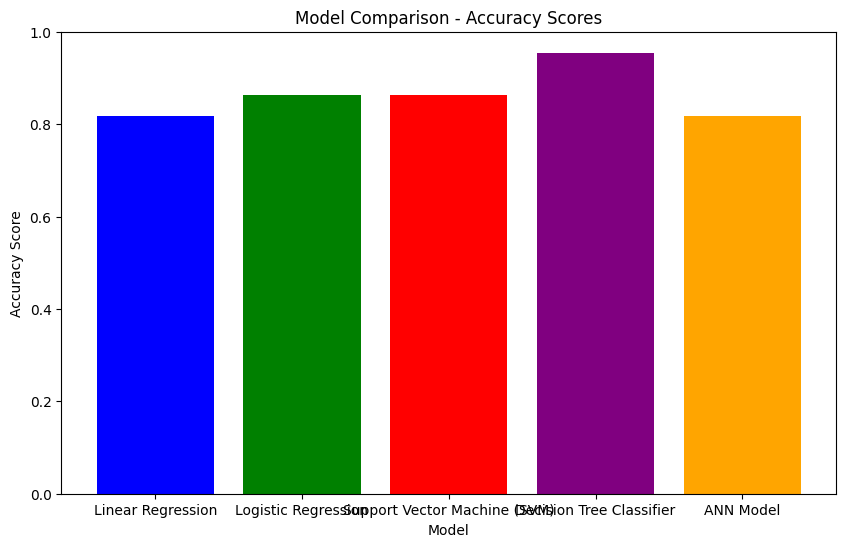

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('/content/cricket_players_injuries.csv')

# Filter by Nationality (e.g., "Australia")
filtered_data = data[data['Nationality'] == 'Australia']

# Clean numeric columns (remove commas, invalid values like '-', '–', and strings like '124[nb 2]')
numeric_columns = [
    'Test Wickets', 'ODI Wickets', 'FC Wickets', 'LA Wickets',
    'Test Bowling Average', 'ODI Bowling Average', 'FC Bowling Average', 'LA Bowling Average',
    'Home Wickets', 'Away Wickets', 'Last 5 Years Wickets', 'Last 2 Years Wickets'
]

# Replace commas, invalid values ('-', '–', '124[nb 2]', etc.) with NaN or 0, then convert to float
for col in numeric_columns:
    filtered_data[col] = filtered_data[col].replace(
        {',': '', '-': '0', '–': '0', r'\[.*\]': '0'}, regex=True)
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')

# Fill NaN values with 0
filtered_data = filtered_data.fillna(0)

# Simulate 'Selected' column
filtered_data['Selected'] = (
    (filtered_data['ODI Wickets'] > 150) | (filtered_data['Test Bowling Average'] < 30)
).astype(int)

# Feature Selection (bowler-specific features)
features = [
    'Test Matches', 'ODI Matches', 'FC Matches', 'LA Matches',
    'Test Wickets', 'ODI Wickets', 'FC Wickets', 'LA Wickets',
    'Test Bowling Average', 'ODI Bowling Average', 'FC Bowling Average', 'LA Bowling Average',
    'Home Wickets', 'Away Wickets', 'Last 5 Years Wickets', 'Last 2 Years Wickets'
]
X = filtered_data[features]  # Features
y = filtered_data['Selected']  # Target variable

# Normalize Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define ANN Model
ann_model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile ANN Model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train ANN Model
ann_model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=0)

# Evaluate ANN Model
ann_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)[1]  # Accuracy score of ANN

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine (SVM)": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

# Store accuracy scores for traditional models
accuracy_scores = []

# Train and evaluate each model (excluding ANN for now as it's handled separately)
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Convert continuous predictions to binary for classification (for Linear Regression)
    if model_name == "Linear Regression":
        y_pred = np.round(y_pred)  # For Linear Regression, round predictions to binary

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Append the ANN accuracy to the list of accuracy scores
accuracy_scores.append(ann_accuracy)

# Visualization of accuracy scores
model_names = list(models.keys()) + ['ANN Model']
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()



#Using plots to make teams of players that are most compatible with eachother regarding their stats.

In [39]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Read the data
df = pd.read_csv('/content/cricket_players_injuries.csv')

# Function to remove special characters from a string
def remove_special_characters(value):
    if isinstance(value, str):
        return re.sub(r'[^a-zA-Z0-9\s]', '', value)  # Remove all non-alphanumeric characters (except spaces)
    return value

# Function to clean and replace invalid values with the column mean
def clean_and_replace_with_mean(column):
    column = column.astype(str)
    # Replace unwanted characters and patterns
    column = column.str.replace(r'\D+', '', regex=True)  # Remove all non-numeric characters
    column = column.str.replace(r'\d+\[\w*\]', '', regex=True)  # Remove bracketed text
    column = pd.to_numeric(column, errors='coerce')  # Convert to numeric, coercing errors to NaN
    mean_value = column.mean()  # Compute the mean of the column
    column.fillna(mean_value, inplace=True)  # Fill NaN values with the mean
    return column

# Clean the 'Top score' columns
for col in ['Test Top score', 'ODI Top score', 'FC Top score', 'LA Top score']:
    if col in df.columns:
        df[col] = clean_and_replace_with_mean(df[col])

# Clean the 'Catches/stumpings' columns
for col in ['Test Catches/stumpings', 'ODI Catches/stumpings', 'FC Catches/stumpings', 'LA Catches/stumpings']:
    if col in df.columns:
        # Clean the data
        df[col] = df[col].astype(str).str.replace(r'\D+', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)

# Clean the '100s/50s' columns
for col in ['Test 100s/50s', 'ODI 100s/50s', 'FC 100s/50s', 'LA 100s/50s']:
    if col in df.columns:
        # Split into '100s' and '50s'
        df[[f'{col} 100s', f'{col} 50s']] = df[col].str.split('/', expand=True, n=1)
        df[f'{col} 100s'] = pd.to_numeric(df[f'{col} 100s'], errors='coerce')
        df[f'{col} 50s'] = pd.to_numeric(df[f'{col} 50s'], errors='coerce')
        df[f'{col} 100s'].fillna(df[f'{col} 100s'].mean(), inplace=True)
        df[f'{col} 50s'].fillna(df[f'{col} 50s'].mean(), inplace=True)

# Apply cleaning to other numeric columns
for column in df.columns[2:]:
    if column not in ['Primary Role','Player']: # Avoid cleaning "Primary Role", maintain its original type
        df[column] = clean_and_replace_with_mean(df[column])

# Apply special character removal across the dataset (except 'Primary Role')
for column in df.columns:
    if column != 'Primary Role': # Exclude 'Primary Role' to avoid changing type
        df[column] = df[column].apply(remove_special_characters)

# Allow role-based filtering for both Batsman and Bowler
role_filter = input("Enter roles to filter (e.g., 'Batsman', 'Bowler', or leave blank for all): ").strip().lower()

if role_filter:
    roles = role_filter.split(',')  # Allow filtering multiple roles by comma separation
    df = df[df['Primary Role'].str.contains('|'.join(roles), case=False, na=False)]

# Save cleaned data
df.to_csv('cleaned_data.csv', index=False)

# Preview cleaned data
print(df.head())


Enter roles to filter (e.g., 'Batsman', 'Bowler', or leave blank for all): 
             Player   Nationality Primary Role  Test Matches  ODI Matches  \
0  Sachin Tendulkar         India      Batsman           200          463   
1       Virat Kohli         India      Batsman           119          295   
2        Brian Lara   West Indies       Bowler           131          299   
3     Ricky Ponting     Australia      Batsman           168          375   
4    Jacques Kallis  South Africa      Batsman           166          329   

   FC Matches  LA Matches  Test Runs  ODI Runs  FC Runs  ...  \
0       310.0         551    15921.0     18426  25396.0  ...   
1       125.0         145     9145.0     13906   4188.0  ...   
2       261.0         429    11953.0     10405  22156.0  ...   
3       289.0         456    13378.0     13704  24150.0  ...   
4       257.0         424    13289.0     11579  19695.0  ...   

   Bottom 4 Teams Runs  Home Wickets  Away Wickets  Last 5 Years Wickets  \


In [43]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Assuming 'df' is your DataFrame
data = df

# Reset the index to avoid any issues with access
data.reset_index(drop=True, inplace=True)

# Drop the 'Latest Injury' column as it contains too many NaNs
data.drop(columns=['Latest Injury'], inplace=True, errors='ignore')

# Select only numerical features, excluding 'Player' and categorical columns like 'Primary Role'
numerical_features = data.select_dtypes(include=['number']).drop(columns=['Player'], errors='ignore')

# Check that there are no NaN values in the numerical data (before applying t-SNE)
print("Missing values in numerical features before filling:")
print(numerical_features.isna().sum())

# Fill NaN values in numerical columns with the median (or mean if preferred)
numerical_features = numerical_features.fillna(numerical_features.median())

# Check again to ensure no NaN values remain
print("Missing values in numerical features after filling:")
print(numerical_features.isna().sum())

# Ensure all data passed to t-SNE is numeric (double-check any remaining non-numeric columns)
numerical_features = numerical_features.apply(pd.to_numeric, errors='coerce')

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(numerical_features)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])

# Add player names back to the t-SNE results
tsne_df['Player'] = data['Player']  # Add back the player names

# Preview the resulting t-SNE DataFrame
print(tsne_df.head())

# Visualization with Plotly
fig = px.scatter(tsne_df, x='Dimension 1', y='Dimension 2', hover_data=['Player'], title="t-SNE Visualization of Players")
fig.show()


Missing values in numerical features before filling:
Test Matches              0
ODI Matches               0
FC Matches                0
LA Matches                0
Test Runs                 0
ODI Runs                  0
FC Runs                   0
LA Runs                   0
Test Average              0
ODI Average               0
FC Average                0
LA Average                0
Test Wickets              0
ODI Wickets               0
FC Wickets                0
LA Wickets                0
Test Bowling Average      0
ODI Bowling Average       0
FC Bowling Average        0
LA Bowling Average        0
Home Runs                 0
Away Runs                 0
Last 5 Years Runs         0
Last 2 Years Runs         0
Top 4 Teams Runs          0
Bottom 4 Teams Runs       0
Home Wickets              0
Away Wickets              0
Last 5 Years Wickets      0
Last 2 Years Wickets      0
Top 4 Teams Wickets       0
Bottom 4 Teams Wickets    0
Injury Month Duration     0
Number of Injuries     

In [44]:
fig = px.scatter(
    tsne_df,
    x='Dimension 1',
    y='Dimension 2',
    text='Player',
    title='t-SNE Visualization of Cricket Statistics',
    template='plotly_dark'
)

fig.update_traces(textposition='top center', marker=dict(size=10, color='blue'))
fig.update_layout(showlegend=False)

fig.show()

In [46]:
# Check the columns in the DataFrame to identify the relevant column
print(tsne_df.columns)


Index(['Dimension 1', 'Dimension 2', 'Player', 'Primary Role'], dtype='object')


In [60]:
import pandas as pd
import numpy as np

# Assuming you have a 'Primary Role' column to distinguish between batsmen and bowlers
# Separate batsmen and bowlers
batsmen = tsne_df[tsne_df['Primary Role'] == 'Batsman'].copy()
bowlers = tsne_df[tsne_df['Primary Role'] == 'Bowler'].copy()

# Define the number of teams (100 teams with 6 batsmen and 5 bowlers per team)
num_teams = 100
batsmen_needed = num_teams * 6  # 6 batsmen per team
bowlers_needed = num_teams * 5  # 5 bowlers per team

# Check if there are enough batsmen and bowlers
if len(batsmen) < batsmen_needed or len(bowlers) < bowlers_needed:
    raise ValueError("Not enough players to form the desired number of teams.")

# Step 1: Shuffle the batsmen and bowlers
batsmen = batsmen.sample(frac=1, random_state=42).reset_index(drop=True)
bowlers = bowlers.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Slice the data to get the exact number of batsmen and bowlers needed
batsmen = batsmen.iloc[:batsmen_needed]
bowlers = bowlers.iloc[:bowlers_needed]

# Step 3: Create teams by selecting 6 batsmen and 5 bowlers for each team
teams_list = []
for i in range(num_teams):
    team_batsmen = batsmen.iloc[i * 6:(i + 1) * 6]
    team_bowlers = bowlers.iloc[i * 5:(i + 1) * 5]
    team = pd.concat([team_batsmen, team_bowlers], ignore_index=True)
    teams_list.append(team)

# Step 4: Combine all teams into one DataFrame
teams_df = pd.concat(teams_list, ignore_index=True)

# Step 5: Assign a team number for each player (from 0 to num_teams - 1)
teams_df['Team'] = np.repeat(np.arange(num_teams), 11)  # Each team has 11 players

# Step 6: Group players by their team and display the result
teams = teams_df.groupby('Team')['Player'].apply(list).reset_index()

# Display the resulting teams
print(teams)


    Team                                             Player
0      0  [Glenn Maxwell, Shaun Marsh, Aaron Finch, Shau...
1      1  [Carlton Baugh, Shaun Marsh, Carlton Baugh, Sh...
2      2  [Aaron Finch, Nicholas Pooran, Shaun Marsh, De...
3      3  [Charith Senanayake, Rahmanullah Gurbaz, Shubm...
4      4  [Aaron Finch, Soumya Sarkar, Shaun Marsh, Rich...
..   ...                                                ...
95    95  [Romesh Kaluwitharana, Ian Healy, Glenn Maxwel...
96    96  [Aaron Finch, Soumya Sarkar, Simon Katich, Tau...
97    97  [Shaun Marsh, William Porterfield, Shaun Marsh...
98    98  [Shaun Marsh, Usman Khawaja, Temba Bavuma, Bra...
99    99  [Shaun Marsh, Shaun Marsh, Aaron Finch, Sam Bi...

[100 rows x 2 columns]


In [68]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Assuming 'Primary Role' column exists and contains either 'Batsman' or 'Bowler'
batsmen = tsne_df[tsne_df['Primary Role'] == 'Batsman'].copy()
bowlers = tsne_df[tsne_df['Primary Role'] == 'Bowler'].copy()

# Ensure the number of teams is 100
num_teams = 100
batsmen_needed = num_teams * 6  # 6 batsmen per team
bowlers_needed = num_teams * 5  # 5 bowlers per team

# Check if there are enough batsmen and bowlers
if len(batsmen) < batsmen_needed or len(bowlers) < bowlers_needed:
    raise ValueError("Not enough players to form the desired number of teams.")

# Shuffle the batsmen and bowlers
batsmen = batsmen.sample(frac=1, random_state=42).reset_index(drop=True)
bowlers = bowlers.sample(frac=1, random_state=42).reset_index(drop=True)

# Slice the data to get the exact number of batsmen and bowlers needed
batsmen = batsmen.iloc[:batsmen_needed]
bowlers = bowlers.iloc[:bowlers_needed]

# Combine the batsmen and bowlers into a single DataFrame
combined_players = pd.concat([batsmen[['Player', 'Dimension 1', 'Dimension 2']],
                              bowlers[['Player', 'Dimension 1', 'Dimension 2']]], ignore_index=True)

# Compute the distance matrix for batsmen only
coords_batsmen = batsmen[['Dimension 1', 'Dimension 2']].values
distances_batsmen = cdist(coords_batsmen, coords_batsmen, metric='euclidean')

# Compute the distance matrix for bowlers only
coords_bowlers = bowlers[['Dimension 1', 'Dimension 2']].values
distances_bowlers = cdist(coords_bowlers, coords_bowlers, metric='euclidean')

# Initialize the teams list and a set to track visited players
teams = []
visited_batsmen = set()
visited_bowlers = set()

# Step 1: Assign players to teams
for _ in range(num_teams):
    team_batsmen = []
    team_bowlers = []

    # Step 2: Assign 6 batsmen
    for i in range(len(batsmen)):
        if batsmen.iloc[i]['Player'] not in visited_batsmen:
            # Find closest batsmen using distances_batsmen
            closest_players = np.argsort(distances_batsmen[i])[1:7]
            team_batsmen.append(batsmen.iloc[i]['Player'])
            visited_batsmen.add(batsmen.iloc[i]['Player'])
            # Use correct distance matrix (distances_batsmen) and update visited_batsmen
            visited_batsmen.update([batsmen.iloc[j]['Player'] for j in closest_players if j < len(batsmen)])

        # Stop if we have 6 batsmen
        if len(team_batsmen) == 6:
            break

    # Step 3: Assign 5 bowlers
    for i in range(len(bowlers)):
        if bowlers.iloc[i]['Player'] not in visited_bowlers:
            # Find closest bowlers using distances_bowlers
            closest_players = np.argsort(distances_bowlers[i])[1:6]
            team_bowlers.append(bowlers.iloc[i]['Player'])
            visited_bowlers.add(bowlers.iloc[i]['Player'])
            # Use correct distance matrix (distances_bowlers) and update visited_bowlers
            visited_bowlers.update([bowlers.iloc[j]['Player'] for j in closest_players if j < len(bowlers)])

        # Stop if we have 5 bowlers
        if len(team_bowlers) == 5:
            break

    # Combine the batsmen and bowlers for the team
    team = team_batsmen + team_bowlers
    teams.append(team)

# Step 4: Ensure each team has 11 players, no empty slots
teams = [team + [''] * (11 - len(team)) if len(team) < 11 else team for team in teams]

# Step 5: Create a DataFrame with teams
team_df = pd.DataFrame(teams, columns=[f"Player {i+1}" for i in range(11)])
team_df['Team Number'] = team_df.index + 1  # Add team number for clarity

# Step 6: Print the DataFrame
print(team_df)


              Player 1               Player 2            Player 3  \
0        Glenn Maxwell            Shaun Marsh         Aaron Finch   
1      Nicholas Pooran  Rassie van der Dussen  Charith Senanayake   
2   Jermaine Blackwood       Liam Livingstone       Soumya Sarkar   
3         Yasir Hameed           Sam Billings     Shimron Hetmyer   
4       Ravi Ratnayeke          Usman Khawaja      Curtis Campher   
..                 ...                    ...                 ...   
95                                                                  
96                                                                  
97                                                                  
98                                                                  
99                                                                  

              Player 4       Player 5            Player 6          Player 7  \
0         Temba Bavuma  Carlton Baugh       Duleep Mendis  Mitchell Johnson   
1   Rahmanull